# Project Case Study Descriptive Statistics & Probability

<b>Problem Statement:<b>
    
Create a relevant customer target profile for each separate product of treadmill shown below:
    
1. KP281 : $1500

2. KP481 : $1750

3. KP781 : $2500

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [597]:
warnings.filterwarnings('ignore')

In [598]:
plt.rcParams['figure.figsize'] = (10,5)

# Import Data
1. Find shape
2. Find null
3. Find duplicated
4. Describe dataframe
5. Find value_counts
6. Find unique
7. Find dataframe.info

In [599]:
a_df = pd.read_csv('train.csv')

In [600]:
a_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [601]:
a_df.shape

(180, 9)

In [602]:
a_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [603]:
a_df.duplicated().sum()

0

In [604]:
a_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [605]:
a_df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [606]:
a_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [607]:
a_df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [608]:
a_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [609]:
a_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [610]:
a_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [611]:
a_df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [612]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Boxplot to observe median and outliers
1. Median of Age, Education, Usage, Fitness, Income, Miles are observed and matches with df.describe() output
2. Outliers are visually observed for all the attributes

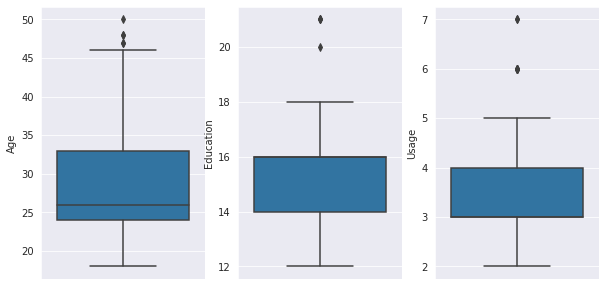

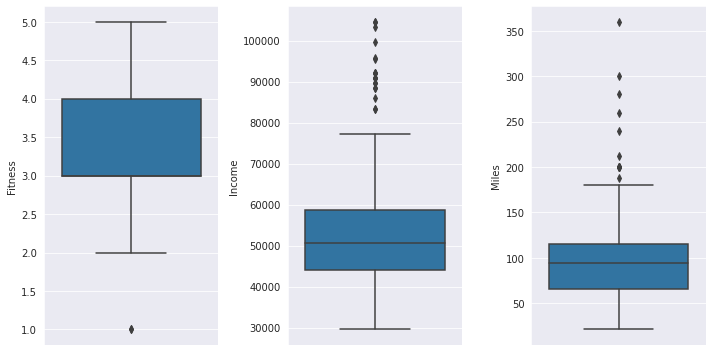

In [613]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)
sns.boxplot(y='Age', data=a_df, ax=ax1)
sns.boxplot(y='Education', data=a_df, ax=ax2)
sns.boxplot(y='Usage', data=a_df, ax=ax3)

f, (ax1, ax2, ax3) = plt.subplots(1,3)
sns.boxplot(y='Fitness', data=a_df, ax=ax1)
sns.boxplot(y='Income', data=a_df, ax=ax2)
sns.boxplot(y='Miles', data=a_df, ax=ax3)

f.tight_layout()

# Function to detect outliers
1. After having the graphical view of outliers through boxplot, the below function calcuates and shows numerical version of the same for mentioned attributes

In [614]:
def detect_outliers(df,attribute):
    df_local = df.copy()
    Q1 = np.percentile(df_local[attribute],25)
    Q3 = np.percentile(df_local[attribute],75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5*IQR
    UB = Q3 + 1.5*IQR
    print("Q1: {}".format(Q1))
    print("Q3: {}".format(Q3))
    print("IQR: {}".format(IQR))
    print("Lower Bound: {}".format(LB))
    print("Upper Bound: {}".format(UB))
    outliers = df_local.loc[(df_local[attribute] < LB) | (df_local[attribute] > UB)]
    print("Number of outliers: {}".format(outliers.shape[0]))
    return outliers

# List down numeric columns

In [615]:
for column in a_df.columns:
    if a_df[column].dtype == 'int64':
        print(column)

Age
Education
Usage
Fitness
Income
Miles


# Get outliers for the attribute Age
# Total number of outliers = 5

In [616]:
detect_outliers(a_df,'Age')

Q1: 24.0
Q3: 33.0
IQR: 9.0
Lower Bound: 10.5
Upper Bound: 46.5
Number of outliers: 5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


# Get outliers for the attribute Education
# Total number of outliers = 4

In [617]:
detect_outliers(a_df,'Education')

Q1: 14.0
Q3: 16.0
IQR: 2.0
Lower Bound: 11.0
Upper Bound: 19.0
Number of outliers: 4


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


# Get outliers for the attribute Usage
# Total number of outliers = 9

In [618]:
detect_outliers(a_df,'Usage')

Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Number of outliers: 9


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


# Get outliers for the attribute Fitness
# Total number of outliers = 2

In [619]:
detect_outliers(a_df,'Fitness')

Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Number of outliers: 2


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


# Get outliers for the attribute Income
# Total number of outliers = 19

In [620]:
detect_outliers(a_df,'Income')

Q1: 44058.75
Q3: 58668.0
IQR: 14609.25
Lower Bound: 22144.875
Upper Bound: 80581.875
Number of outliers: 19


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


# Get outliers for the attribute Miles
# Total number of outliers = 13

In [621]:
detect_outliers(a_df,'Miles')

Q1: 66.0
Q3: 114.75
IQR: 48.75
Lower Bound: -7.125
Upper Bound: 187.875
Number of outliers: 13


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


# Value counts for each product and pie representation

In [622]:
a_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

# Observation from pie chart:
1.Product price and market share of sales is inversely proportional. Example below

a. KP281 has sale of 44.44% but has the lowest price of $1500

b. KP481 has sale of 33.33% but has the higher price of $1750

c. KP781 has sale of 22.22% but has the highest price of $2500

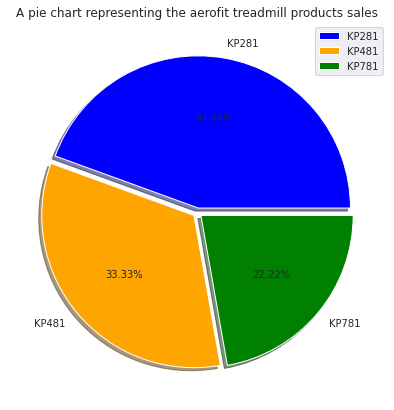

In [623]:
labels = ['KP281', 'KP481', 'KP781']
size = a_df['Product'].value_counts()
colors = ['blue', 'orange', 'green']
explode = [0.03, 0.03, 0.03]

plt.rcParams['figure.figsize'] = (9,7)
plt.pie(size,colors=colors,labels=labels, explode=explode,shadow=True, autopct='%.2f%%')
plt.title('A pie chart representing the aerofit treadmill products sales')
plt.axis('off')
plt.legend()
plt.show()

# Function to plot product sales distribution against the given attribute

In [624]:
def get_multivariate_analysis(df, attribute):
    plt.rcParams['figure.figsize'] = (9,7)
    plt.hist(df.loc[df['Product'] == 'KP281', attribute], label='KP281')
    plt.hist(df.loc[df['Product'] == 'KP481', attribute], label='KP481')
    plt.hist(df.loc[df['Product'] == 'KP781', attribute], label='KP781')
    plt.title('{} Vs Product Sale'.format(attribute))
    plt.xlabel('Feature magnitude: {}'.format(attribute))
    plt.ylabel('Product sale count')
    plt.legend(loc='upper right')
    plt.show()

# Distribution of products KP281, KP481 and KP781 w.r.t. Age of customer
1. KP281 is HIGHLY favourable among the customers with age 22-28 and favourable among 18-22 plus 29-32 as well
2. KP481 is HIGHLY favourable among the customers with age 25-28 and favourable among 22-24 plus 32-36 as well
3. KP781 is HIGHLY favourable among the customers with age 23-27 and favourable among 28-32 as well

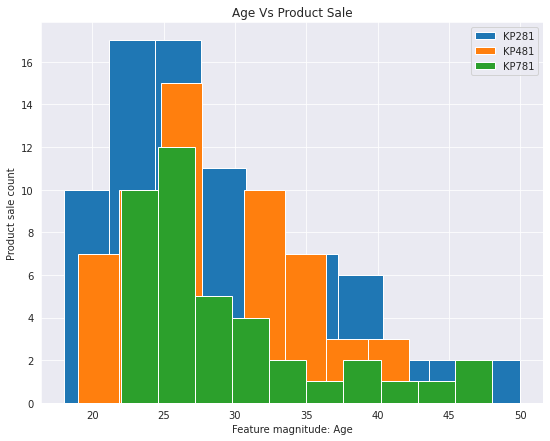

In [625]:
get_multivariate_analysis(a_df, 'Age')

# Distribution of products KP281, KP481 and KP781 w.r.t. Education of customer
1. KP281 is HIGHLY favourable among the customers with education 15-16 and favourable among 13-14 as well
2. KP481 is HIGHLY favourable among the customers with education 15-16 and favourable among 13-14 as well
3. KP781 is HIGHLY favourable among the customers with education 17-18 and favourable among 15-16 as well

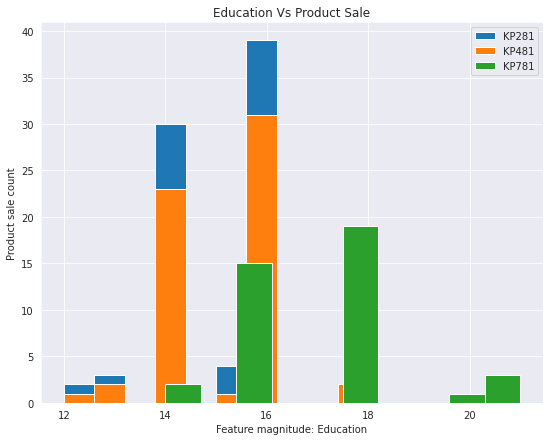

In [626]:
get_multivariate_analysis(a_df, 'Education')

# Distribution of products KP281, KP481 and KP781 w.r.t. Usage of customer
1. KP281 is HIGHLY favourable among the customers with usage 3/week and favourable among 4/week as well
2. KP481 is HIGHLY favourable among the customers with usage 3/week and favourable among 2/week as well
3. KP781 is HIGHLY favourable among the customers with usage 4/week and favourable among 5-6/week as well

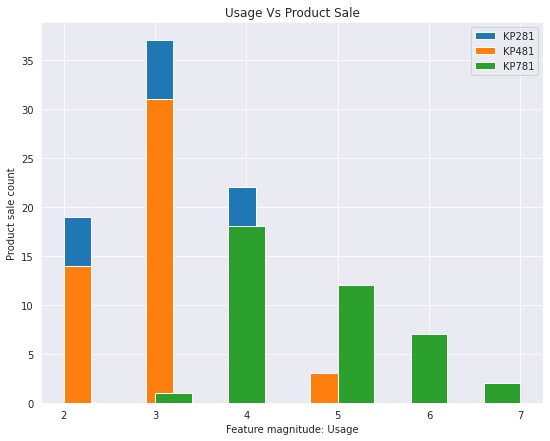

In [627]:
get_multivariate_analysis(a_df, 'Usage')

# Distribution of products KP281, KP481 and KP781 w.r.t. Fitness of customer
1. KP281 is HIGHLY favourable among the customers with fitness rating 3
2. KP481 is HIGHLY favourable among the customers with fitness rating 3
3. KP781 is HIGHLY favourable among the customers with fitness rating 5

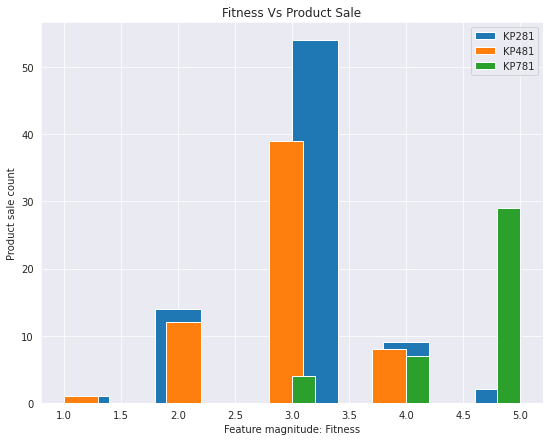

In [628]:
get_multivariate_analysis(a_df, 'Fitness')

# Distribution of products KP281, KP481 and KP781 w.r.t. Income of customer
1. KP281 is HIGHLY favourable among the customers with income in range of 35K-55K
2. KP481 is HIGHLY favourable among the customers with income in range of 44K-55K
3. KP781 is HIGHLY favourable among the customers with income in range of 85K-95K plus 50K-52K

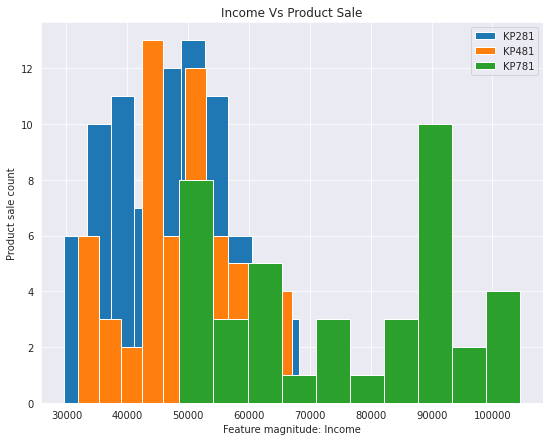

In [629]:
get_multivariate_analysis(a_df, 'Income')

# Distribution of products KP281, KP481 and KP781 w.r.t. Miles of customer
1. KP281 is HIGHLY favourable among the customers with miles in range of 80-100
2. KP481 is HIGHLY favourable among the customers with miles in range of 80-100
3. KP781 is HIGHLY favourable among the customers with miles in range of 140-210

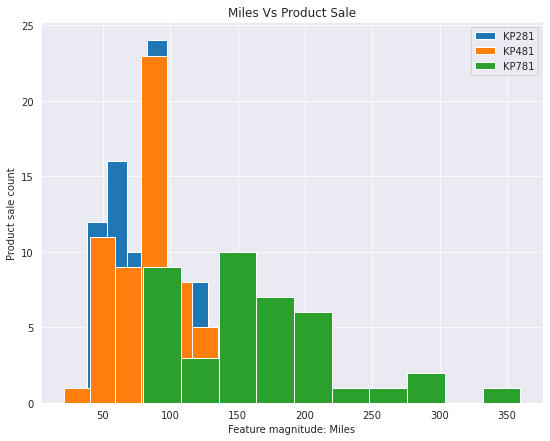

In [630]:
get_multivariate_analysis(a_df, 'Miles')

# Distribution of products KP281, KP481 and KP781 w.r.t. Gender of customer
1. Males and Females are showing almost same precedence to KP281 and KP481
2. However Males surpass way more than Females while buying KP781

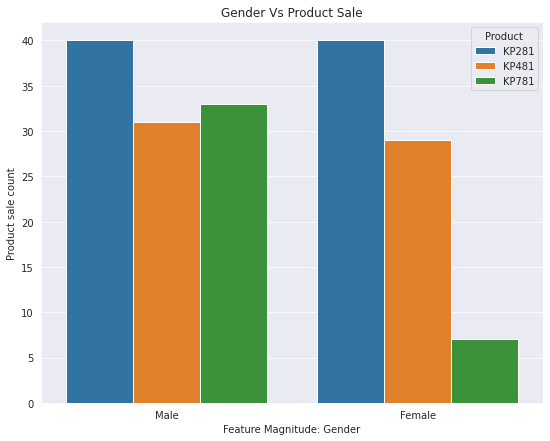

In [631]:
plt.rcParams['figure.figsize'] = (9,7)
sns.countplot(x='Gender', hue='Product', data=a_df)
plt.title('Gender Vs Product Sale')
plt.xlabel('Feature Magnitude: Gender')
plt.ylabel('Product sale count')
plt.show()

# Distribution of products KP281, KP481 and KP781 w.r.t. MaritalStatus of customer
1. Partenred customers are more in numbers compared to single while buying any of the 3 products KP281/481/781

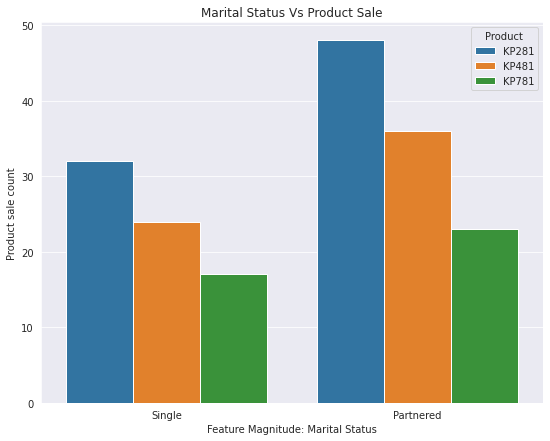

In [632]:
plt.rcParams['figure.figsize'] = (9,7)
sns.countplot(x='MaritalStatus', hue='Product', data=a_df)
plt.title('Marital Status Vs Product Sale')
plt.xlabel('Feature Magnitude: Marital Status')
plt.ylabel('Product sale count')
plt.show()

# Boxplot to show the median age of males vs females and single vs partnered while buying KP281, KP481 & KP781
1. Median age of Male vs Female for buying KP281 and KP781 is almost same
2. However median age of Female is higher than those of Male while buying KP481. Male:around 24,Female:around 29
3. Partnered customers are having higher median age while purchasing any of the 3 products

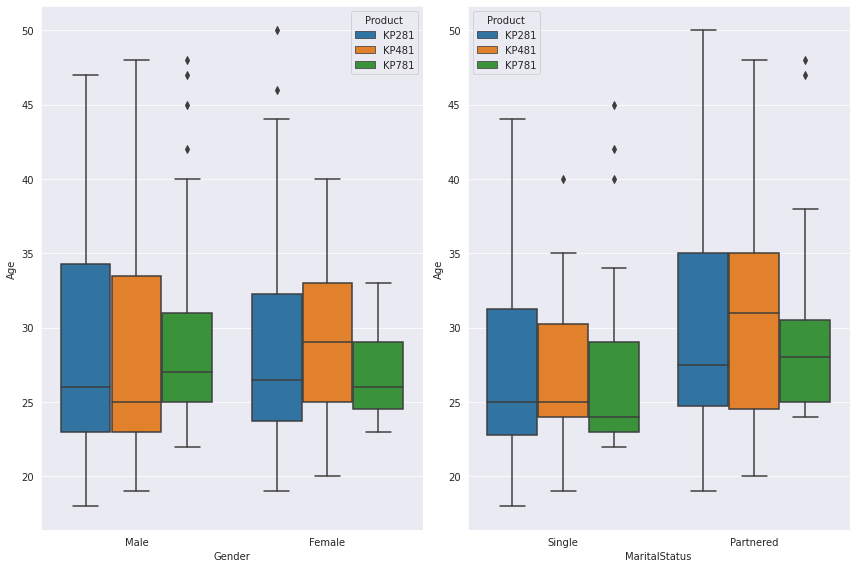

In [633]:
plt.rcParams['figure.figsize'] = (12,8)
f,(ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Age',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Age',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Boxplot to show the median income of males vs females and single vs partnered while buying KP281, KP481 & KP781
1. Median income of Male vs Female for buying KP281 and KP481 is almost same
2. However median income of Male is higher than Female while buying KP781. Male:around 76K,Female:around 69K
3. Partnered customers are having overall higher median income while purchasing any of the 3 products
4. However, partnered median income is quite higher than single while buying KP781
5. Partnered around: 85K and single around 58K while buying KP781

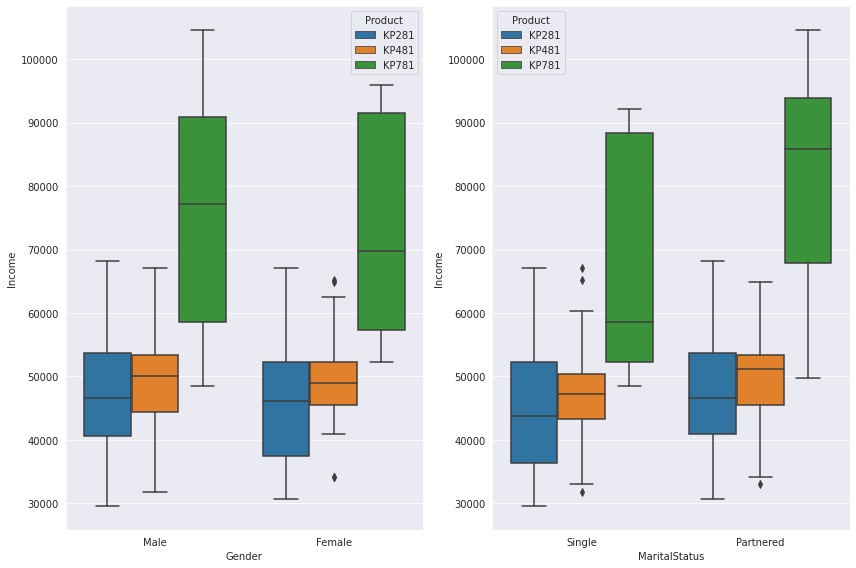

In [634]:
plt.rcParams['figure.figsize'] = (12,8)
f, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Income',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Income',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Boxplot to show the median miles of males vs females and single vs partnered while buying KP281, KP481 & KP781
1. Median miles of Male vs Female for buying KP281 and KP481 is almost same
2. However median miles of Female is higher than Male while buying KP781. Male:around 160,Female:around 180
3. Median miles of single vs partnered is almost same while buying KP281 and KP481
4. However, partnered median miles is quite higher than single while buying KP781

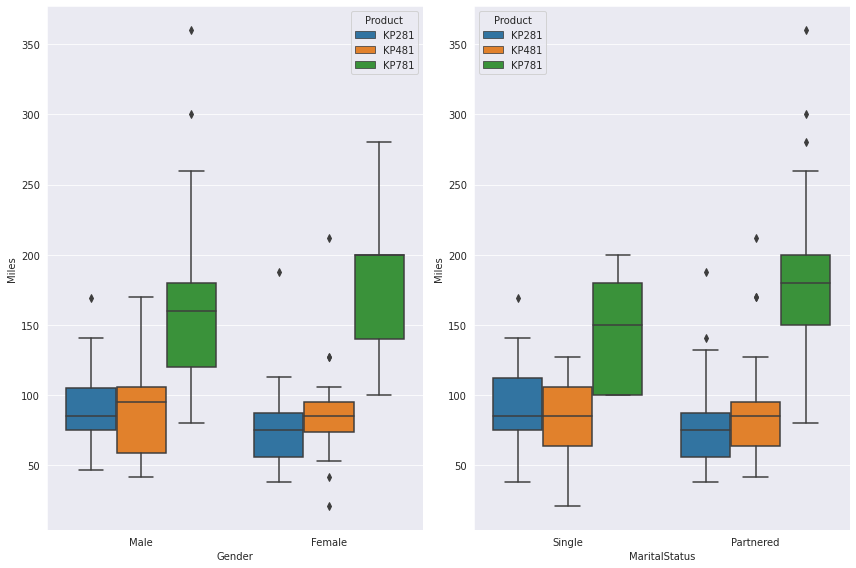

In [635]:
plt.rcParams['figure.figsize'] = (12,8)
f, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Miles',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Miles',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Boxplot to show the median usage of males vs females and single vs partnered while buying KP281, KP481 & KP781

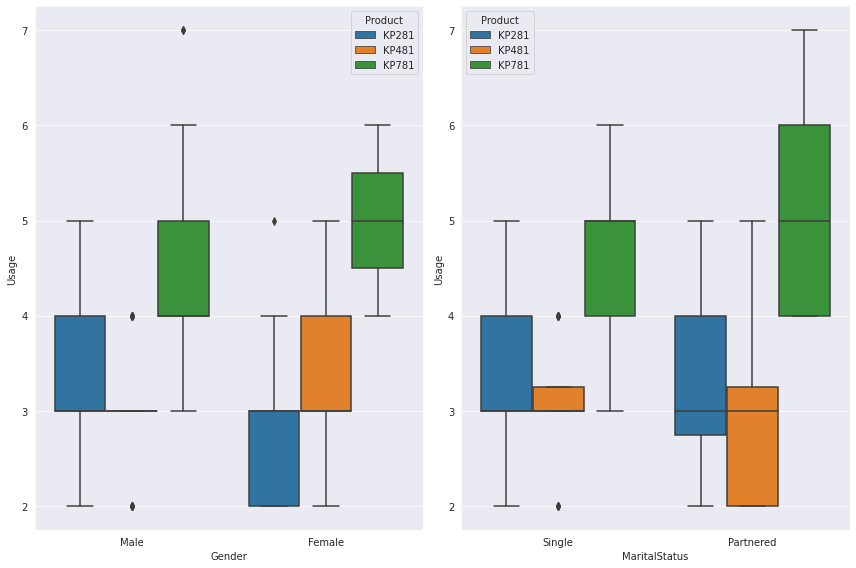

In [636]:
plt.rcParams['figure.figsize'] = (12,8)
f, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Usage',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Usage',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Boxplot to show the median education of males vs females and single vs partnered while buying KP281, KP481 & KP781
1. Median education of male, female, single or partnered is higher while buying KP781 as compared to the others

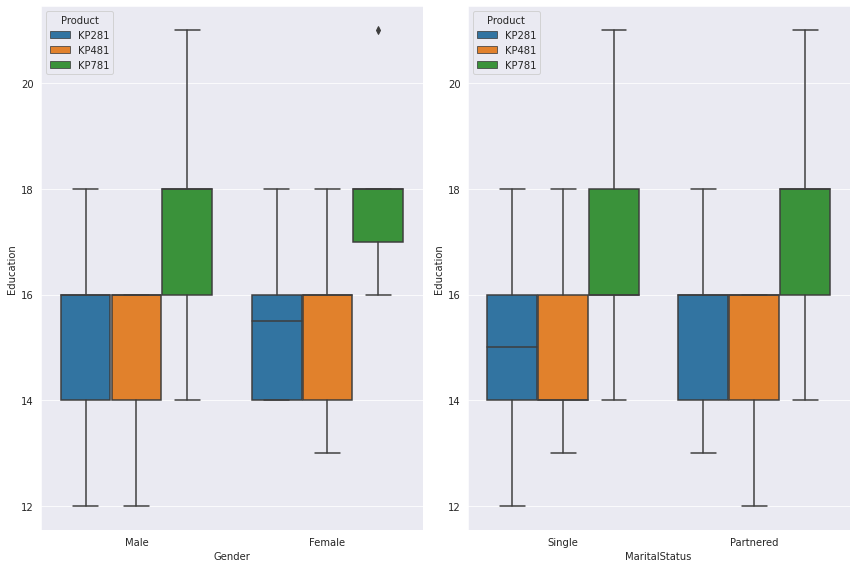

In [637]:
plt.rcParams['figure.figsize'] = (12,8)
f, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Education',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Education',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Boxplot to show the median fitness of males vs females and single vs partnered while buying KP281, KP481 & KP781

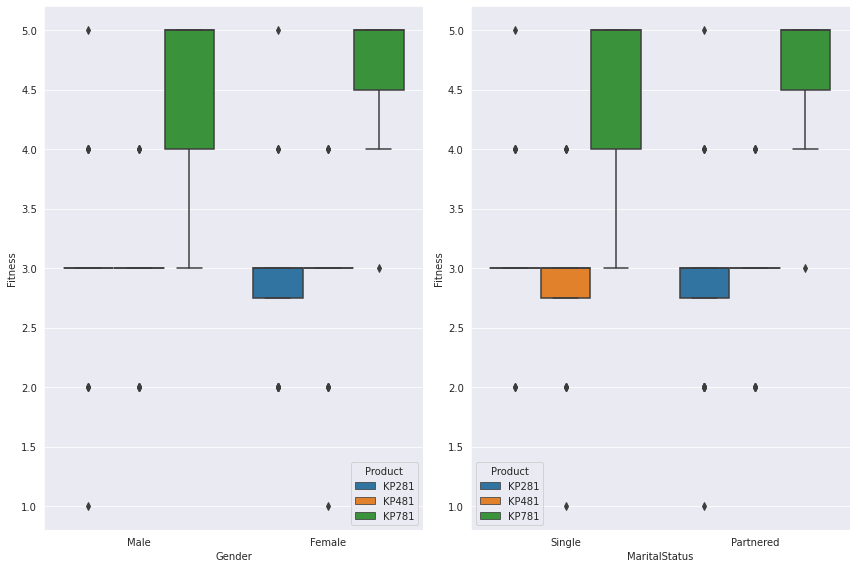

In [638]:
plt.rcParams['figure.figsize'] = (12,8)
f, (ax1,ax2) = plt.subplots(1,2)
sns.boxplot(x='Gender',y='Fitness',hue='Product',data=a_df,ax=ax1)
sns.boxplot(x='MaritalStatus',y='Fitness',hue='Product',data=a_df,ax=ax2)
f.tight_layout()

# Distplot to depict the variation in data distribution of KP281, KP481 and KP781 for males and females w.r.t below attributes -
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

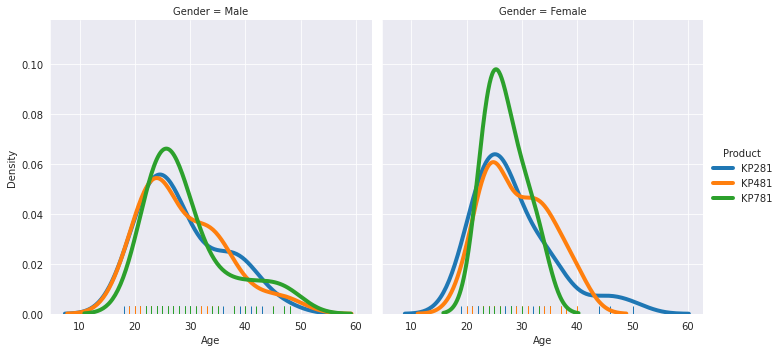

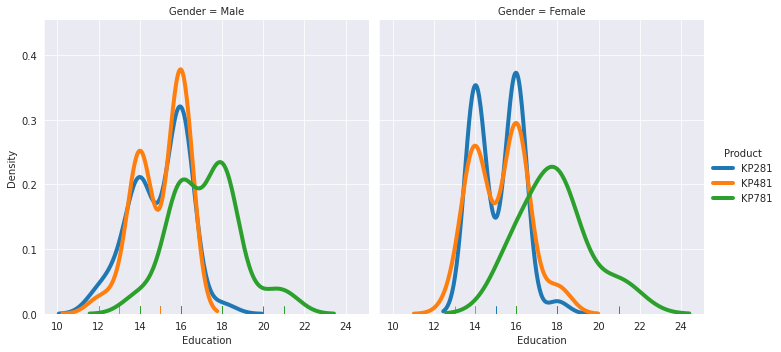

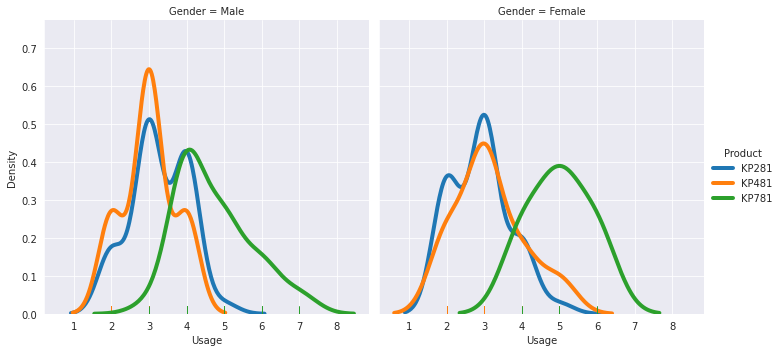

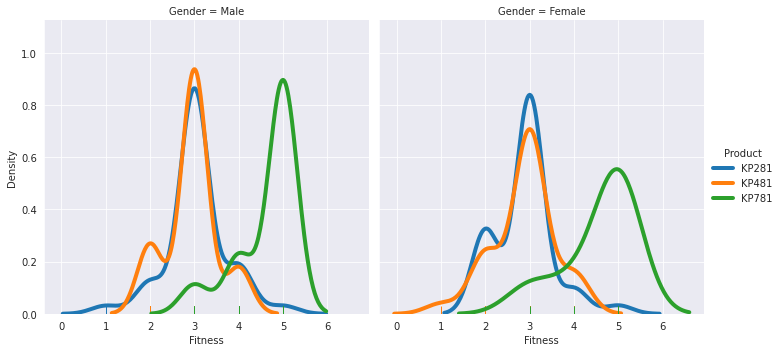

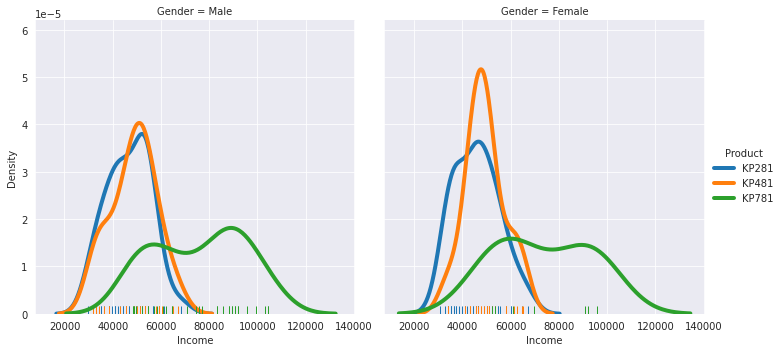

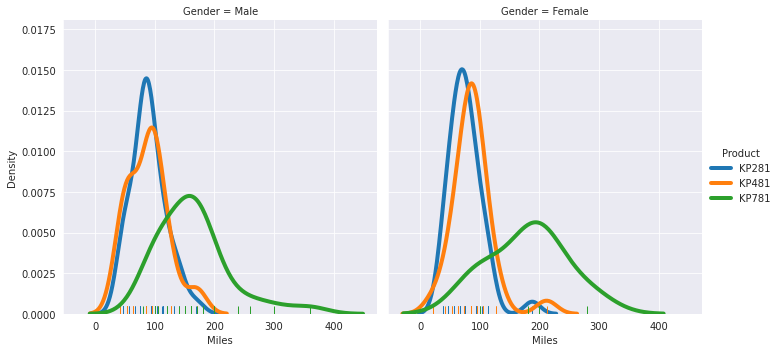

In [639]:
sns.set_style('darkgrid')
g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Age', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Education', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Usage', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Fitness', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Income', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='Gender', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Miles', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

plt.show()

# Distplot to depict the variation in data distribution of KP281, KP481 and KP781 for single and partnered w.r.t below attributes -
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

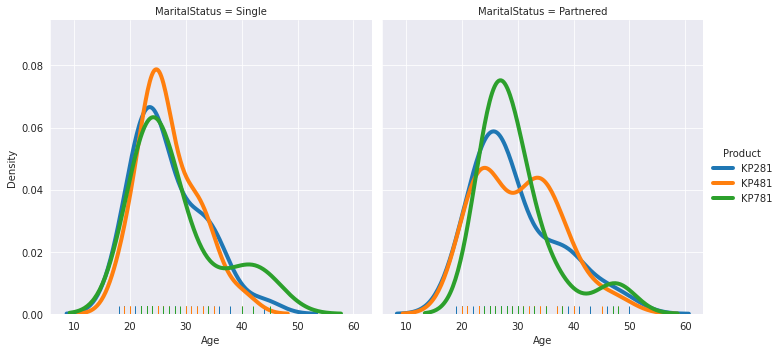

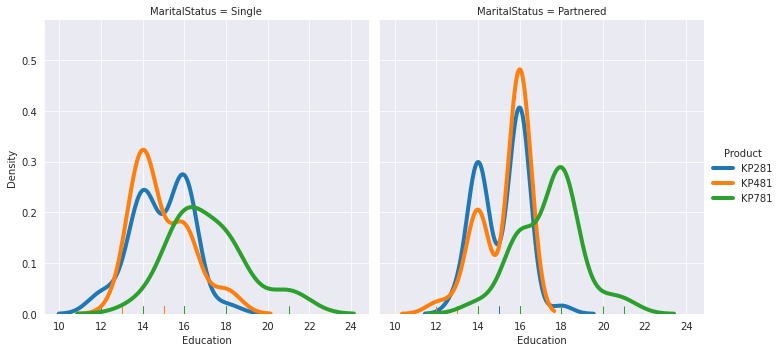

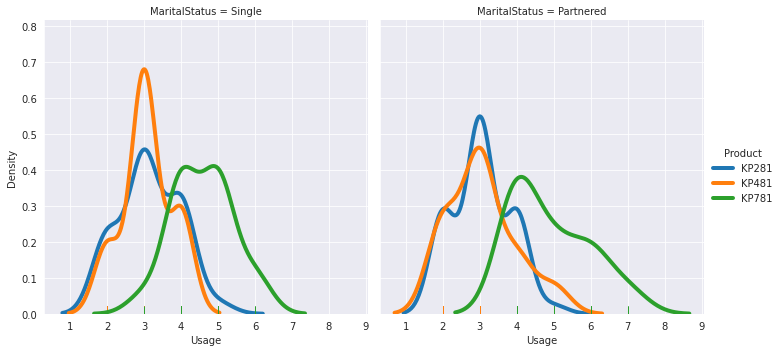

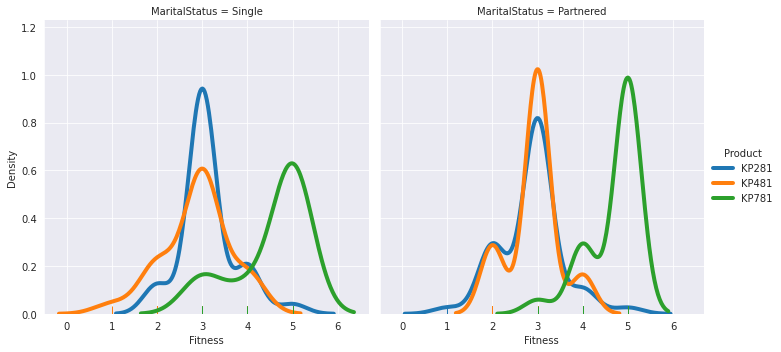

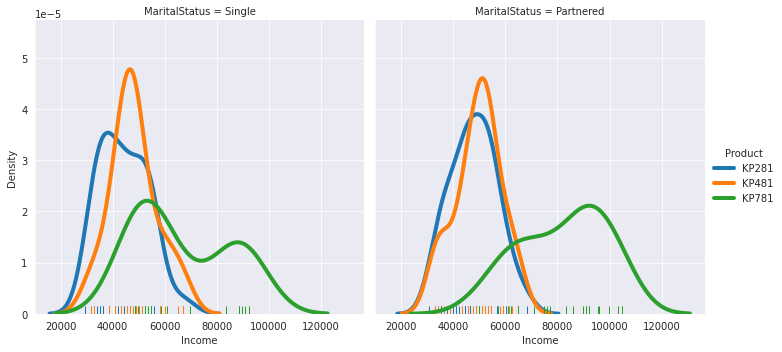

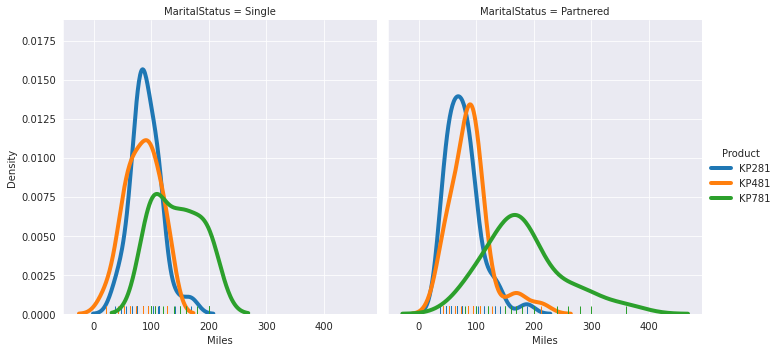

In [640]:
sns.set_style('darkgrid')

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Age', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Education', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Usage', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Fitness', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Income', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

g = sns.FacetGrid(a_df, col='MaritalStatus', hue='Product', size=5, aspect=1)
g.map(sns.distplot, 'Miles', hist=False, rug=True, kde_kws=dict(linewidth=4))
g.add_legend()

plt.show()

# Create copy of the dataframe to perform below operations -
1. Convert age values to age-group values
2. Convert education values to education-group values
3. Convert usage values to usage-group values
4. Convert income vlaues to income-group values
5. Convert miles values to miles-group values

This convertion will be helpful to reduce the size of two-way contingency tables and to make it look more relevant

In [641]:
a_df_new = a_df.copy()

# Function to assign the column values to particual group based on bin ranges defined

In [642]:
def convert_to_groups(df,attribute,group_attribute,bins,labels):
    df[group_attribute] = pd.cut(df[attribute],bins=bins,labels=labels,right=False)
    return df

# Convert Age to AgeGroup

In [643]:
age_bins = [0,18,23,28,33,38,43,48,53]
age_labels=['(0-18)','(18-22)','(23-27)','(28-32)','(33-37)','(38-42)','(43-47)','(48-52)']
a_df_new = convert_to_groups(a_df_new,'Age','AgeGroup',age_bins,age_labels)

# Convert Education to EducationGroup

In [644]:
education_bins = [0,12,14,16,18,20,22]
education_labels = ['(0-12)','(12-13)','(14-15)','(16-17)','(18-19)','(20-21)']
a_df_new = convert_to_groups(a_df_new,'Education','EducationGroup',education_bins,education_labels)

# Convert Usage to UsageGroup

In [645]:
usage_bins = [0,2,4,6,8]
usage_labels = ['(0-2)','(2-3)','(4-5)','(6-7)']
a_df_new = convert_to_groups(a_df_new,'Usage','UsageGroup',usage_bins,usage_labels)

# Convert Income to IncomeGroup

In [646]:
income_bins = [0,30000,40000,50000,60000,70000,80000,90000,100000]
income_labels = ['(0-30K)','(31K-40K)','(41K-50K)','(51K-60K)','(61K-70K)','(71K-80K)','(81K-90K)','(91K-100K)']
a_df_new = convert_to_groups(a_df_new,'Income','IncomeGroup',income_bins,income_labels)

# Convert Miles to MilesGroup

In [647]:
miles_bins = [0,50,100,150,200,250,300,350,400]
miles_labels = ['(0-50)','(51-100)','(101-150)','(151-200)','(201-250)','(251-300)','(301-350)','(351-400)']
a_df_new = convert_to_groups(a_df_new,'Miles','MilesGroup',miles_bins,miles_labels)

# Drop old colums as we have new Group columns now

In [648]:
a_df_new = a_df_new.drop(columns=['Age','Education','Usage','Income','Miles'],axis=1)

In [649]:
a_df_new.head()

,Product,Gender,MaritalStatus,Fitness,AgeGroup,EducationGroup,UsageGroup,IncomeGroup,MilesGroup
0,KP281,Male,Single,4,(18-22),(14-15),(2-3),(0-30K),(101-150)
1,KP281,Male,Single,3,(18-22),(14-15),(2-3),(31K-40K),(51-100)
2,KP281,Female,Partnered,3,(18-22),(14-15),(4-5),(31K-40K),(51-100)
3,KP281,Male,Single,3,(18-22),(12-13),(2-3),(31K-40K),(51-100)
4,KP281,Male,Partnered,2,(18-22),(12-13),(4-5),(31K-40K),(0-50)


# Function to derive two-way contingency table for products KP281, KP481, KP781 w.r.t. given attribute

In [650]:
def get_twoway_contingency_table(df,attribute):
    temp = pd.crosstab(index=df['Product'],columns=df[attribute],margins=True)
    return temp

# Derive two-way contingency table for Product and Gender
1. Calculate probabilities and conditional probability based on contingency table. Examples mentioned below

In [651]:
get_twoway_contingency_table(a_df_new,'Gender')

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# Probability/Conditional probability examples based on contingency table above
1. Probability of Male buying KP281: 40/180
2. Probability of Female buying KP281: 40/180
3. Probability of Male buying KP481: 31/180
4. Probability of Female buying KP481: 29/180
5. Probability of Male buying KP781: 33/180
6. Probability of Female buying KP781: 7/180

Conditional Probability:
1. P(KP281|Male): 40/104
2. P(KP481|Male): 31/104
3. P(KP781|Male): 33/104

4. P(KP281|Female): 40/76
5. P(KP481|Female): 29/76
6. P(KP781|Female): 7/76

7. P(Male|KP281): 40/80
8. P(Male|KP481): 31/60
9. P(Male|KP781): 33/40

10. P(Female|KP281): 40/80
11. P(Female|KP481): 29/60
12. P(Female|KP781): 7/40

# Derive two-way contingency table for Product and MaritalStatus

In [652]:
get_twoway_contingency_table(a_df_new,'MaritalStatus')

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


# Derive two-way contingency table for Product and Fitness

In [653]:
get_twoway_contingency_table(a_df_new,'Fitness')

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


# Derive two-way contingency table for Product and AgeGroup

In [654]:
get_twoway_contingency_table(a_df_new,'AgeGroup')

AgeGroup,(18-22),(23-27),(28-32),(33-37),(38-42),(43-47),(48-52),All
Product,,,,,,,,
KP281,14,30,15,9,7,4,1,80
KP481,7,25,8,13,5,1,1,60
KP781,3,19,9,3,3,2,1,40
All,24,74,32,25,15,7,3,180


# Derive two-way contingency table for Product and EducationGroup

In [655]:
get_twoway_contingency_table(a_df_new,'EducationGroup')

EducationGroup,(12-13),(14-15),(16-17),(18-19),(20-21),All
Product,,,,,,
KP281,5,34,39,2,0,80
KP481,3,24,31,2,0,60
KP781,0,2,15,19,4,40
All,8,60,85,23,4,180


# Derive two-way contingency table for Product and UsageGroup

In [656]:
get_twoway_contingency_table(a_df_new,'UsageGroup')

UsageGroup,(2-3),(4-5),(6-7),All
Product,,,,
KP281,56,24,0,80
KP481,45,15,0,60
KP781,1,30,9,40
All,102,69,9,180


# Derive two-way contingency table for Product and IncomeGroup

In [657]:
get_twoway_contingency_table(a_df_new,'IncomeGroup')

IncomeGroup,(0-30K),(31K-40K),(41K-50K),(51K-60K),(61K-70K),(71K-80K),(81K-90K),(91K-100K),All
Product,,,,,,,,,
KP281,1,22,25,26,6,0,0,0,80
KP481,0,9,21,23,7,0,0,0,60
KP781,0,0,5,6,6,4,7,9,37
All,1,31,51,55,19,4,7,9,177


# Derive two-way contingency table for Product and MilesGroup

In [658]:
get_twoway_contingency_table(a_df_new,'MilesGroup')

MilesGroup,(0-50),(51-100),(101-150),(151-200),(201-250),(251-300),(301-350),(351-400),All
Product,,,,,,,,,
KP281,12,50,16,2,0,0,0,0,80
KP481,5,39,13,2,1,0,0,0,60
KP781,0,1,12,16,7,2,1,1,40
All,17,90,41,20,8,2,1,1,180


# Create a new copy for dataframe to perform label encoding for finding correlation among the different attributes of given data

In [659]:
a_df_encoded = a_df.copy()

# Function to perform label encoding on given column

In [660]:
def label_encoding(df,attribute):
    le = LabelEncoder()
    label = le.fit_transform(df[attribute])
    df = df.drop(columns=[attribute],axis=1)
    df[attribute] = label
    return df

# Encode Product column
1. KP281 -> 0
2. KP481 -> 1
3. KP781 -> 2

In [661]:
#LabelEncoding:
#KP281:0
#KP481:1
#KP781:2
a_df_encoded = label_encoding(a_df_encoded,'Product')

# Encode Gender column
1. Female -> 0
2. Male -> 1

In [662]:
#LabelEncoding:
#Female:0
#Male:1
a_df_encoded = label_encoding(a_df_encoded,'Gender')

# Encode MaritalStatus column
1. Partnered -> 0
2. Single -> 1

In [663]:
#LabelEncoding:
#Partnered:0
#Single:1
a_df_encoded = label_encoding(a_df_encoded,'MaritalStatus')

In [664]:
a_df_encoded.head()

,Age,Education,Usage,Fitness,Income,Miles,Product,Gender,MaritalStatus
0,18,14,3,4,29562,112,0,1,1
1,19,15,2,3,31836,75,0,1,1
2,19,14,4,3,30699,66,0,0,0
3,19,12,3,3,32973,85,0,1,1
4,20,13,4,2,35247,47,0,1,0


# Draw pairplot to find the correlation among all the attributes

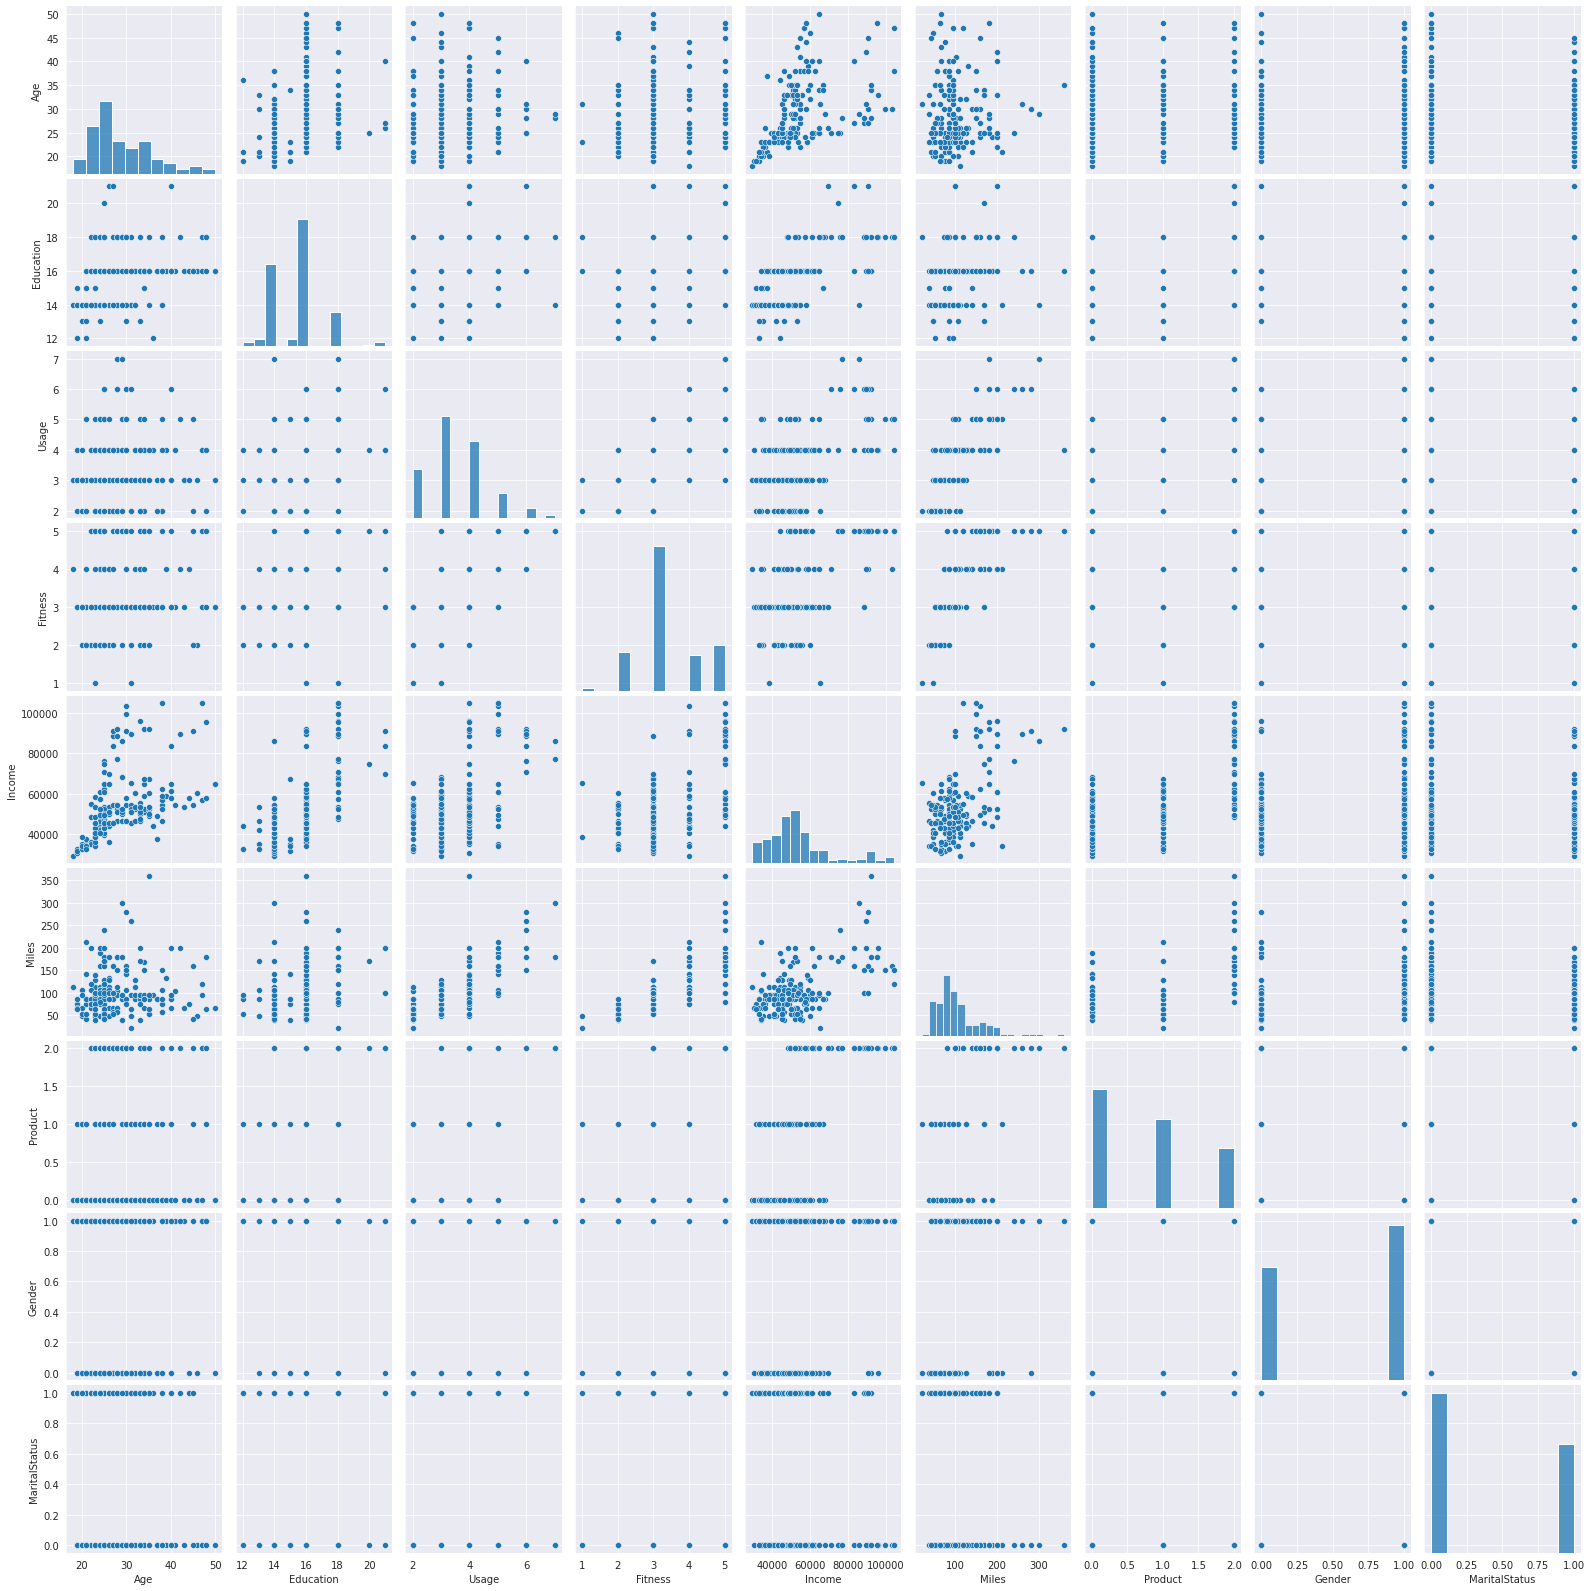

In [665]:
sns.pairplot(a_df_encoded)
plt.show()

# Create correlation dataframe

In [666]:
a_correl = a_df_encoded.corr()

In [667]:
a_correl

,Age,Education,Usage,Fitness,Income,Miles,Product,Gender,MaritalStatus
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.032225,0.027544,-0.192152
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.495018,0.094089,-0.068569
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.537447,0.214424,0.007786
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.594883,0.254609,0.050751
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.624168,0.202053,-0.150293
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.571596,0.217869,-0.025639
Product,0.032225,0.495018,0.537447,0.594883,0.624168,0.571596,1.000000,0.230653,0.017602
Gender,0.027544,0.094089,0.214424,0.254609,0.202053,0.217869,0.230653,1.000000,0.018836
MaritalStatus,-0.192152,-0.068569,0.007786,0.050751,-0.150293,-0.025639,0.017602,0.018836,1.000000


# Correlation heatmap
1. Dark Green => Highly positively correlated
2. Dark Brown => Highly negatively correlated
3. Light Color=> Lesser correlated

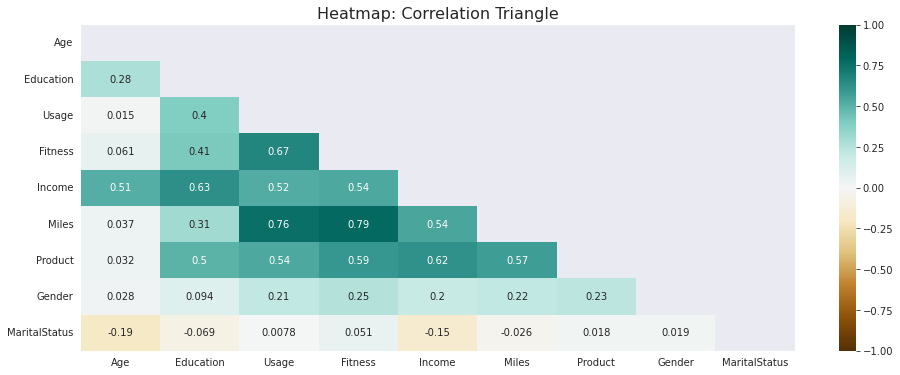

In [668]:
plt.rcParams['figure.figsize'] = (9,7)
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(a_correl, dtype=np.bool_))
heatmap = sns.heatmap(a_correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap: Correlation Triangle',fontdict={'fontsize':16})
plt.show()